In [22]:
#use a pretrained model(week6 ADS): https://tfhub.dev/tensorflow/tfjs-model/posenet/resnet50/quantized/1/1/default/1

# Kaggle API


In [23]:
#This cell has to be runned when you want to upload the API token file to google colab, cell below if local
#if you use a local jupyter notebook the kaggle.json has to be in the following path --> C:\Users\User\.kaggle

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google.colab'

In [167]:
#use this cell if you working local and if you work in google colab use the cell above
# Then move kaggle.json into the folder where the API expects to find it.
#!pip install kaggle 
#freigeben falls zum ersten Mal
import kaggle
#!mkdir -p ~\.kaggle\ && move kaggle.json \.kaggle\ && chmod 600 ~\.kaggle\kaggle.json 
# move anstelle von mv verwenden bei Windows

#wenn / gemäss Internet \ verwenden, da Syntax nicht korrekt, jedoch weiter Warnungen...

In [168]:
#search for a dataset
!kaggle datasets list -s 'rock-paper-scissor'


ref                                                             title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/frtgnn/rock-paper-scissor                              Rock - Paper - Scissor                        220MB  2019-11-07 17:52:43            470         81  0.6875           
datasets/drgfreeman/rockpaperscissors                           Rock-Paper-Scissors Images                    306MB  2019-03-01 01:01:11           8320        148  0.875            
datasets/sanikamal/rock-paper-scissors-dataset                  Rock Paper Scissors Dataset                   452MB  2019-04-24 19:53:04           2772         60  0.875            
datasets/glushko/rock-paper-scissors-dataset                    Rock, Paper, Scissors Data

In [193]:
#download multiple datasets
!kaggle datasets download -d drgfreeman/rockpaperscissors
!kaggle datasets download -d anirudhabhagwat/rock-paper-scissors-images 
!kaggle datasets download -d shounakdesai/rock-paper-and-scissor-images 

#Name ohne '' gemacht, damit es funktioniert hat...


  0%|          | 0.00/306M [00:00<?, ?B/s]
  1%|1         | 4.00M/306M [00:00<00:09, 33.6MB/s]
  3%|2         | 9.00M/306M [00:00<00:08, 35.9MB/s]
  5%|4         | 14.0M/306M [00:00<00:07, 38.5MB/s]
  6%|5         | 18.0M/306M [00:00<00:07, 38.5MB/s]
  8%|7         | 23.0M/306M [00:00<00:07, 39.7MB/s]
  9%|9         | 28.0M/306M [00:00<00:07, 40.5MB/s]
 11%|#         | 33.0M/306M [00:00<00:06, 41.0MB/s]
 12%|#2        | 38.0M/306M [00:01<00:06, 41.3MB/s]
 14%|#4        | 43.0M/306M [00:01<00:06, 41.5MB/s]
 15%|#5        | 47.0M/306M [00:01<00:06, 40.6MB/s]
 17%|#6        | 51.0M/306M [00:01<00:06, 40.0MB/s]
 18%|#7        | 55.0M/306M [00:01<00:06, 39.4MB/s]
 19%|#9        | 59.0M/306M [00:01<00:06, 37.5MB/s]
 21%|##        | 63.0M/306M [00:01<00:06, 36.7MB/s]
 22%|##1       | 67.0M/306M [00:01<00:06, 36.2MB/s]
 23%|##3       | 71.0M/306M [00:01<00:06, 35.4MB/s]
 25%|##4       | 75.0M/306M [00:02<00:06, 35.4MB/s]
 26%|##5       | 79.0M/306M [00:02<00:06, 35.0MB/s]
 27%|##7       | 83.


  0%|          | 0.00/226M [00:00<?, ?B/s]
  1%|1         | 3.00M/226M [00:00<00:08, 28.8MB/s]
  3%|3         | 7.00M/226M [00:00<00:06, 34.4MB/s]
  5%|4         | 11.0M/226M [00:00<00:07, 28.7MB/s]
  6%|6         | 14.0M/226M [00:00<00:08, 25.0MB/s]
  8%|7         | 18.0M/226M [00:00<00:07, 27.8MB/s]
 10%|9         | 22.0M/226M [00:00<00:07, 29.6MB/s]
 12%|#1        | 26.0M/226M [00:00<00:06, 32.4MB/s]
 13%|#3        | 30.0M/226M [00:01<00:06, 34.1MB/s]
 15%|#5        | 34.0M/226M [00:01<00:05, 34.0MB/s]
 17%|#6        | 38.0M/226M [00:01<00:06, 28.3MB/s]
 19%|#8        | 42.0M/226M [00:01<00:06, 30.8MB/s]
 21%|##        | 47.0M/226M [00:01<00:05, 35.2MB/s]
 23%|##2       | 51.0M/226M [00:01<00:05, 36.1MB/s]
 24%|##4       | 55.0M/226M [00:01<00:04, 36.7MB/s]
 27%|##6       | 60.0M/226M [00:01<00:04, 38.4MB/s]
 29%|##8       | 65.0M/226M [00:02<00:04, 39.5MB/s]
 31%|###       | 69.0M/226M [00:02<00:04, 39.2MB/s]
 32%|###2      | 73.0M/226M [00:02<00:04, 37.4MB/s]
 34%|###4      | 77.


  0%|          | 0.00/35.4M [00:00<?, ?B/s]
  3%|2         | 1.00M/35.4M [00:00<00:04, 8.45MB/s]
  6%|5         | 2.00M/35.4M [00:00<00:04, 7.56MB/s]
 11%|#1        | 4.00M/35.4M [00:00<00:03, 9.01MB/s]
 17%|#6        | 6.00M/35.4M [00:00<00:02, 10.6MB/s]
 23%|##2       | 8.00M/35.4M [00:00<00:02, 12.6MB/s]
 28%|##8       | 10.0M/35.4M [00:00<00:01, 14.5MB/s]
 37%|###6      | 13.0M/35.4M [00:00<00:01, 17.8MB/s]
 45%|####5     | 16.0M/35.4M [00:01<00:00, 20.8MB/s]
 54%|#####3    | 19.0M/35.4M [00:01<00:00, 23.0MB/s]
 65%|######5   | 23.0M/35.4M [00:01<00:00, 26.5MB/s]
 73%|#######3  | 26.0M/35.4M [00:01<00:00, 26.2MB/s]
 82%|########1 | 29.0M/35.4M [00:01<00:00, 26.3MB/s]
 93%|#########3| 33.0M/35.4M [00:01<00:00, 29.1MB/s]
100%|##########| 35.4M/35.4M [00:01<00:00, 20.8MB/s]


# Scraping for each category

In [49]:
from bs4 import BeautifulSoup
import requests

#set page url 

URL = "https://www.google.com/search?q=rock-paper-scissors+hand+sign&tbm=isch&ved=2ahUKEwiphtPg4J_3AhVN3IUKHe6hD5AQ2-cCegQIABAA&oq=rock-paper-scissors+hand+sign&gs_lcp=CgNpbWcQAzIECAAQHjIGCAAQCBAeOgcIIxDvAxAnOggIABAIEB4QEzoGCAAQBxAeOgQIABATOggIABAHEB4QEzoICAAQCBAHEB5QvgZY01VgildoEHAAeACAAfgBiAHwGJIBBjI5LjUuMpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=JnleYqnbAs24lwTuw76ACQ&bih=831&biw=1680&rlz=1C5CHFA_enCH928CH928"
page = requests.get(URL)


soup = BeautifulSoup(page.content, 'html.parser')

#find all urls in img-tag <img> with class="yWs4tf"
image_tags = soup.find_all('img', class_='yWs4tf')


#add all urls to links-dict
links = []
for image_tag in image_tags:
    links.append(image_tag['src'])

#request all pictures and save

import urllib.request
for i, url in enumerate(links):
    urllib.request.urlretrieve(url, str('photo_' + str(i+1) + '.jpg'))

### Zip-File etc.

In [194]:
# TensorFlow and tf.keras
#!pip install tensorflow
#! pip install tensorflow_datasets
import tensorflow as tf
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import tensorflow_datasets as tfds

print(tf.__version__)
print(tf.config.list_physical_devices())

2.8.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [195]:
#setup folder where you will save logs for tensorflow 
root_logdir = os.path.join(os.curdir,"my_logs_project")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [196]:
from zipfile import ZipFile

# Create a ZipFile Object and load file.zip in it for first dataset
with ZipFile('rockpaperscissors.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
   zipObj.extractall('rockpaperscissors')

#for 2.dataset
with ZipFile('rock-paper-and-scissor-images.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
   zipObj.extractall('rockpaperscissors')

#for 3.dataset
with ZipFile('rock-paper-scissors-images.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
   zipObj.extractall('rockpaperscissors')


### Data cleaning

In [197]:
import shutil
import os
#remove unnötige Folder

# location
location = 'rockpaperscissors'
   
# director
dir = 'rps-cv-images'
   
# path
path = os.path.join(location, dir)   
# removing directory
shutil.rmtree(path)


In [198]:
#move folders to the target folder for dataset 2

original = r'rockpaperscissors\image_data\paper'
target = r'rockpaperscissors\paper'

shutil.move(original, target)

original = r'rockpaperscissors\image_data\rock'
target = r'rockpaperscissors\rock'

shutil.move(original, target)

original = r'rockpaperscissors\image_data\scissors'
target = r'rockpaperscissors\scissors'

shutil.move(original, target)

# location
location = 'rockpaperscissors'
   
# director
dir = 'image_data'
   
# path
path = os.path.join(location, dir)   
# removing directory
shutil.rmtree(path)


In [199]:
#move folders to the target folder for dataset 3

original1 = r'rockpaperscissors\final_data\paper'
target1 = r'rockpaperscissors\paper\paper'
shutil.move(original1, target1+'_2')

original2 = r'rockpaperscissors\final_data\rock'
target2 = r'rockpaperscissors\rock\rock'

shutil.move(original2, target2+'_2')

original3 = r'rockpaperscissors\final_data\scissors'
target3 = r'rockpaperscissors\scissors\scissors'

shutil.move(original3, target3+'_2')

# location
location = 'rockpaperscissors'
   
# director
dir = 'final_data'
   
# path
path = os.path.join(location, dir)   
# removing directory
shutil.rmtree(path)


In [200]:
# zwei Gif-files welche zu bereinigen sind, funktioniert noch nicht
#os.remove('rockpaperscissors\rock\rock\png_to_gif.gif')
#os.remove('rockpaperscissors\rock\rock\dcgan.gif')

### Resize Images

In [201]:
# nächste Blöcke funktionieren und size wird auf 192 192 reduziert, jedoch Meldung jeweils Bad file... Code könnte schlanker ausgestaltet werden jedoch unklar wie
import glob
dst_dir = 'rockpaperscissors/rock'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/rock/*.png')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/rock/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/rock\00nKV8oHuTGi20gq.png
Bad file: ./rockpaperscissors/rock\01dM3ewPIsnBICu1.png
Bad file: ./rockpaperscissors/rock\02vG75hQW9Vp4oTl.png
Bad file: ./rockpaperscissors/rock\0bioBZYFCXqJIulm.png
Bad file: ./rockpaperscissors/rock\0NDYNEoDui7o64gU.png
Bad file: ./rockpaperscissors/rock\0OEXfEooCXlljaEl.png
Bad file: ./rockpaperscissors/rock\0P6uxM8Vr1DwySHe.png
Bad file: ./rockpaperscissors/rock\19H63c0MWD56EWNq.png
Bad file: ./rockpaperscissors/rock\1BqjHe5igJAgUjiN.png
Bad file: ./rockpaperscissors/rock\1COBZEE1ALiJIivQ.png
Bad file: ./rockpaperscissors/rock\1DxbXT3M2qiMjCmC.png
Bad file: ./rockpaperscissors/rock\1e1VCnCEApnFh9Oo.png
Bad file: ./rockpaperscissors/rock\1mnAKQCHEDbtjPX2.png
Bad file: ./rockpaperscissors/rock\1MOm36DHK0R8OfIC.png
Bad file: ./rockpaperscissors/rock\1UucZqS3qblvU0cH.png
Bad file: ./rockpaperscissors/rock\1UXuUYJ4rVj2eSvt.png
Bad file: ./rockpaperscissors/rock\1VoYiUgPE6h45MLu.png
Bad file: ./rockpaperscissors/rock\1vvcitV1s17gK

Bad file: ./rockpaperscissors/rock\bn4i63wrObqbJECw.png
Bad file: ./rockpaperscissors/rock\BnnRzew7yA30gyts.png
Bad file: ./rockpaperscissors/rock\boppgwG3Rz1zqCNK.png
Bad file: ./rockpaperscissors/rock\BOswKcczxw8dC4kY.png
Bad file: ./rockpaperscissors/rock\bqpOIN5gUl0r6vIS.png
Bad file: ./rockpaperscissors/rock\BRCnAE1A7rvm7o8V.png
Bad file: ./rockpaperscissors/rock\brPQ0E5Gk9L0FHey.png
Bad file: ./rockpaperscissors/rock\brzyLjsQoGb8cmBe.png
Bad file: ./rockpaperscissors/rock\bsj2s38rcZvedHSI.png
Bad file: ./rockpaperscissors/rock\BSMMOAJotDbg08rj.png
Bad file: ./rockpaperscissors/rock\BsWasfK2PdoRNEDw.png
Bad file: ./rockpaperscissors/rock\bsXoToIcgrXUypd0.png
Bad file: ./rockpaperscissors/rock\BTcHjuerLAYWzx8S.png
Bad file: ./rockpaperscissors/rock\bu8W5hPRULeRi0Kr.png
Bad file: ./rockpaperscissors/rock\Bv1IS98JTiuZC7Bs.png
Bad file: ./rockpaperscissors/rock\BvjXvNTvapIFq4bK.png
Bad file: ./rockpaperscissors/rock\bvMd98SEEKS3YxmD.png
Bad file: ./rockpaperscissors/rock\Bvw2wNs7Vb4H5

Bad file: ./rockpaperscissors/rock\HLf2liRRQ2FM3PWB.png
Bad file: ./rockpaperscissors/rock\hMqKoUYAvB91YRuO.png
Bad file: ./rockpaperscissors/rock\hNKauGm372Z48JWy.png
Bad file: ./rockpaperscissors/rock\HnWLgtGVbnoPAaMK.png
Bad file: ./rockpaperscissors/rock\hOgtdOKps4GHrC05.png
Bad file: ./rockpaperscissors/rock\how0vUOltuU1m495.png
Bad file: ./rockpaperscissors/rock\HptkIYoVoE2yV9Yk.png
Bad file: ./rockpaperscissors/rock\hqD5rX5jXifrtMJO.png
Bad file: ./rockpaperscissors/rock\HTlhfHf6CMkGBrlh.png
Bad file: ./rockpaperscissors/rock\hTzQIKUtmllw7je8.png
Bad file: ./rockpaperscissors/rock\HWvrWXLQywNe1aCF.png
Bad file: ./rockpaperscissors/rock\HxzCqTAGvmLYaHjA.png
Bad file: ./rockpaperscissors/rock\HY0UHs2e3ydpvynQ.png
Bad file: ./rockpaperscissors/rock\hyWWmz1OwgoE5JlU.png
Bad file: ./rockpaperscissors/rock\Hz5ynYPew6XqaLdO.png
Bad file: ./rockpaperscissors/rock\i1GxDtZ5awTW7Rsf.png
Bad file: ./rockpaperscissors/rock\I1T89xw2qr4aTrzq.png
Bad file: ./rockpaperscissors/rock\i5FY2iOcMjYyo

Bad file: ./rockpaperscissors/rock\nLGBKJAhRNQqPFrT.png
Bad file: ./rockpaperscissors/rock\nmxmRD1050oGpGEa.png
Bad file: ./rockpaperscissors/rock\nNB5f3VARZAaHI4U.png
Bad file: ./rockpaperscissors/rock\NND8kMRxPKa3HfWX.png
Bad file: ./rockpaperscissors/rock\No7Qf3DONPRwor5U.png
Bad file: ./rockpaperscissors/rock\NpJEIrbBZBhud8tg.png
Bad file: ./rockpaperscissors/rock\nQ7DM3VMBj0NdM0u.png
Bad file: ./rockpaperscissors/rock\NQxWkhRHMkt2GrpB.png
Bad file: ./rockpaperscissors/rock\nrJIuJU8hyHoYzy5.png
Bad file: ./rockpaperscissors/rock\nrRw9O00nT1ZeOJh.png
Bad file: ./rockpaperscissors/rock\nS9fHg3r4luGv0mF.png
Bad file: ./rockpaperscissors/rock\NSlKVMz6GymflBze.png
Bad file: ./rockpaperscissors/rock\nsnqe5yD6JgUs9Bx.png
Bad file: ./rockpaperscissors/rock\nu556y52qDHFKRYy.png
Bad file: ./rockpaperscissors/rock\NuJjhPSItSWUuMOk.png
Bad file: ./rockpaperscissors/rock\nW7S3LYj4C49mX06.png
Bad file: ./rockpaperscissors/rock\nx0qhNSB7YMLfe2E.png
Bad file: ./rockpaperscissors/rock\nxmKEzuM4rL8E

Bad file: ./rockpaperscissors/rock\Tz2CIaI6bZXdon61.png
Bad file: ./rockpaperscissors/rock\tZFZV6hmUogDBeMl.png
Bad file: ./rockpaperscissors/rock\U3EwYhdeoTjy3xBf.png
Bad file: ./rockpaperscissors/rock\u3nAxX6ZNsAKQ7WC.png
Bad file: ./rockpaperscissors/rock\U4HuPlTKsnXYExzJ.png
Bad file: ./rockpaperscissors/rock\UCkxupMKtpEo5qdk.png
Bad file: ./rockpaperscissors/rock\uCt8rigwmrP07ZVr.png
Bad file: ./rockpaperscissors/rock\UCZq5Q5ovMiGJLwX.png
Bad file: ./rockpaperscissors/rock\UDjD30Rke7seRcaD.png
Bad file: ./rockpaperscissors/rock\udR0gHeGBkkQVGlr.png
Bad file: ./rockpaperscissors/rock\UEdiy4khJQHK0ofn.png
Bad file: ./rockpaperscissors/rock\UElo8u1bUerF3JNe.png
Bad file: ./rockpaperscissors/rock\UJ1D4UeUI0pnDG5h.png
Bad file: ./rockpaperscissors/rock\UjbgpVjrwzH0XvuD.png
Bad file: ./rockpaperscissors/rock\uK8EXLN4mejf6aN0.png
Bad file: ./rockpaperscissors/rock\ULTg1DfgsXpxo2lJ.png
Bad file: ./rockpaperscissors/rock\UMhiPBxOmfSpItMU.png
Bad file: ./rockpaperscissors/rock\UOBPeuMnZRb6Y

In [202]:
dst_dir = 'rockpaperscissors/rock/rock'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/rock/rock/*.jpg')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/rock/rock/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/rock/rock\0.jpg
Bad file: ./rockpaperscissors/rock/rock\1.jpg
Bad file: ./rockpaperscissors/rock/rock\10.jpg
Bad file: ./rockpaperscissors/rock/rock\100.jpg
Bad file: ./rockpaperscissors/rock/rock\101.jpg
Bad file: ./rockpaperscissors/rock/rock\102.jpg
Bad file: ./rockpaperscissors/rock/rock\103.jpg
Bad file: ./rockpaperscissors/rock/rock\104.jpg
Bad file: ./rockpaperscissors/rock/rock\105.jpg
Bad file: ./rockpaperscissors/rock/rock\106.jpg
Bad file: ./rockpaperscissors/rock/rock\107.jpg
Bad file: ./rockpaperscissors/rock/rock\108.jpg
Bad file: ./rockpaperscissors/rock/rock\109.jpg
Bad file: ./rockpaperscissors/rock/rock\11.jpg
Bad file: ./rockpaperscissors/rock/rock\110.jpg
Bad file: ./rockpaperscissors/rock/rock\111.jpg
Bad file: ./rockpaperscissors/rock/rock\112.jpg
Bad file: ./rockpaperscissors/rock/rock\113.jpg
Bad file: ./rockpaperscissors/rock/rock\114.jpg
Bad file: ./rockpaperscissors/rock/rock\115.jpg
Bad file: ./rockpaperscissors/rock/rock\116.jp

Bad file: ./rockpaperscissors/rock/rock\87.jpg
Bad file: ./rockpaperscissors/rock/rock\88.jpg
Bad file: ./rockpaperscissors/rock/rock\89.jpg
Bad file: ./rockpaperscissors/rock/rock\9.jpg
Bad file: ./rockpaperscissors/rock/rock\90.jpg
Bad file: ./rockpaperscissors/rock/rock\91.jpg
Bad file: ./rockpaperscissors/rock/rock\92.jpg
Bad file: ./rockpaperscissors/rock/rock\93.jpg
Bad file: ./rockpaperscissors/rock/rock\94.jpg
Bad file: ./rockpaperscissors/rock/rock\95.jpg
Bad file: ./rockpaperscissors/rock/rock\96.jpg
Bad file: ./rockpaperscissors/rock/rock\97.jpg
Bad file: ./rockpaperscissors/rock/rock\98.jpg
Bad file: ./rockpaperscissors/rock/rock\99.jpg


In [203]:
dst_dir = 'rockpaperscissors/rock/rock_2'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/rock/rock_2/*.jpg')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/rock/rock_2/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/rock/rock_2\image (1).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (10).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (100).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1000).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1001).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1002).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1003).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1004).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1005).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1006).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1007).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1008).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1009).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (101).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1010).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1011).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1012).jpg
Bad 

Bad file: ./rockpaperscissors/rock/rock_2\image (113).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1130).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1131).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1132).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1133).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1134).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1135).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1136).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1137).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1138).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1139).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (114).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1140).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1141).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1142).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1143).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1144).jpg

Bad file: ./rockpaperscissors/rock/rock_2\image (1262).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1263).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1264).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1265).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1266).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1267).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1268).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1269).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (127).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1270).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1271).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1272).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1273).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1274).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1275).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1276).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1277).jp

Bad file: ./rockpaperscissors/rock/rock_2\image (1395).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1396).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1397).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1398).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1399).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (14).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (140).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1400).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1401).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1402).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1403).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1404).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1405).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1406).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1407).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1408).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1409).jpg


Bad file: ./rockpaperscissors/rock/rock_2\image (1525).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1526).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1527).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1528).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1529).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (153).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1530).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1531).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1532).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1533).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1534).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1535).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1536).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1537).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1538).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1539).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (154).jpg

Bad file: ./rockpaperscissors/rock/rock_2\image (1667).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1668).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1669).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (167).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1670).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1671).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1672).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1673).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1674).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1675).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1676).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1677).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1678).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1679).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (168).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1680).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1681).jpg

Bad file: ./rockpaperscissors/rock/rock_2\image (1801).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1802).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1803).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1804).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1805).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1806).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1807).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1808).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1809).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (181).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1810).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1811).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1812).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1813).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1814).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1815).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1816).jp

Bad file: ./rockpaperscissors/rock/rock_2\image (1940).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1941).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1942).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1943).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1944).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1945).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1946).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1947).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1948).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1949).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (195).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1950).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1951).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1952).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1953).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1954).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (1955).jp

Bad file: ./rockpaperscissors/rock/rock_2\image (242).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (243).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (244).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (245).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (246).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (247).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (248).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (249).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (25).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (250).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (251).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (252).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (253).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (254).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (255).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (256).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (257).jpg
Bad file: ./roc

Bad file: ./rockpaperscissors/rock/rock_2\image (380).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (381).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (382).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (383).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (384).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (385).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (386).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (387).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (388).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (389).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (39).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (390).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (391).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (392).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (393).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (394).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (395).jpg
Bad file: ./roc

Bad file: ./rockpaperscissors/rock/rock_2\image (521).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (522).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (523).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (524).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (525).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (526).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (527).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (528).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (529).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (53).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (530).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (531).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (532).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (533).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (534).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (535).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (536).jpg
Bad file: ./roc

Bad file: ./rockpaperscissors/rock/rock_2\image (651).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (652).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (653).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (654).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (655).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (656).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (657).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (658).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (659).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (66).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (660).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (661).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (662).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (663).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (664).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (665).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (666).jpg
Bad file: ./roc

Bad file: ./rockpaperscissors/rock/rock_2\image (793).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (794).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (795).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (796).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (797).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (798).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (799).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (8).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (80).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (800).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (801).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (802).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (803).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (804).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (805).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (806).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (807).jpg
Bad file: ./rockp

Bad file: ./rockpaperscissors/rock/rock_2\image (927).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (928).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (929).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (93).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (930).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (931).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (932).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (933).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (934).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (935).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (936).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (937).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (938).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (939).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (94).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (940).jpg
Bad file: ./rockpaperscissors/rock/rock_2\image (941).jpg
Bad file: ./rock

In [204]:
dst_dir = 'rockpaperscissors/paper'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/paper/*.png')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/paper/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/paper\04l5I8TqdzF9WDMJ.png
Bad file: ./rockpaperscissors/paper\0a3UtNzl5Ll3sq8K.png
Bad file: ./rockpaperscissors/paper\0cb6cVL8pkfi4wF6.png
Bad file: ./rockpaperscissors/paper\0eqArS2GgsBeqgSn.png
Bad file: ./rockpaperscissors/paper\0Og76sl5CJhbxWWx.png
Bad file: ./rockpaperscissors/paper\0RA9rcrv8iVvuDDU.png
Bad file: ./rockpaperscissors/paper\0t08v9bAaA0mXGCQ.png
Bad file: ./rockpaperscissors/paper\0Uomd0HvOB33m47I.png
Bad file: ./rockpaperscissors/paper\0vugygEjxQJPr9yz.png
Bad file: ./rockpaperscissors/paper\0zKU6wEhT2cDe9j0.png
Bad file: ./rockpaperscissors/paper\14K62H4KG1hg5qiJ.png
Bad file: ./rockpaperscissors/paper\1Dfw5FRlS4h60JPX.png
Bad file: ./rockpaperscissors/paper\1fKclJk4eBWOQSR1.png
Bad file: ./rockpaperscissors/paper\1Frbe8cdOdkciOBg.png
Bad file: ./rockpaperscissors/paper\1jHtb93pI8f6pfKo.png
Bad file: ./rockpaperscissors/paper\1oKnUgV2CdCaQUUX.png
Bad file: ./rockpaperscissors/paper\1Tt9U9SzrOm98Xtw.png
Bad file: ./rockpaperscissors/p

Bad file: ./rockpaperscissors/paper\B08mrGoODd5gGTvu.png
Bad file: ./rockpaperscissors/paper\b15QGB4XPECDemV5.png
Bad file: ./rockpaperscissors/paper\B3dlyiRDulDJWOsW.png
Bad file: ./rockpaperscissors/paper\B6dJfDThlXx80Uk6.png
Bad file: ./rockpaperscissors/paper\b8dw4ZOgMTx2h1xI.png
Bad file: ./rockpaperscissors/paper\B9PzXQbhzehhxFRN.png
Bad file: ./rockpaperscissors/paper\B9WSmSgclFPB3TOL.png
Bad file: ./rockpaperscissors/paper\BbOoLEGslGMBu7sj.png
Bad file: ./rockpaperscissors/paper\bddldJIGmQP5CSLD.png
Bad file: ./rockpaperscissors/paper\BfFGJgByTJnxADwA.png
Bad file: ./rockpaperscissors/paper\BH9zAUdmmjlfXwtS.png
Bad file: ./rockpaperscissors/paper\BI9YnLkJ5wFZe6w8.png
Bad file: ./rockpaperscissors/paper\BLqL31aC5YLmx3uF.png
Bad file: ./rockpaperscissors/paper\BoMfAmQYWtoiGHBV.png
Bad file: ./rockpaperscissors/paper\BoXJ7o2SeSRRfuAH.png
Bad file: ./rockpaperscissors/paper\bPTh8OjfiaJfzdcw.png
Bad file: ./rockpaperscissors/paper\BqGdYFfhQ4sOU5Xl.png
Bad file: ./rockpaperscissors/p

Bad file: ./rockpaperscissors/paper\HkBUo9kQDJho4uor.png
Bad file: ./rockpaperscissors/paper\HQSUE6P23pvLctuy.png
Bad file: ./rockpaperscissors/paper\Ht08RX3DQCSdl9Sy.png
Bad file: ./rockpaperscissors/paper\HTETrKtTEB31pvsK.png
Bad file: ./rockpaperscissors/paper\HTSIUeIA1IQrHtHu.png
Bad file: ./rockpaperscissors/paper\Httje79JB2p6ePf0.png
Bad file: ./rockpaperscissors/paper\hu3OxByp0O4KCJft.png
Bad file: ./rockpaperscissors/paper\HU7Q4utMI0vHMxlh.png
Bad file: ./rockpaperscissors/paper\hUDN2qXDxjoGBWqu.png
Bad file: ./rockpaperscissors/paper\HuunhhoTMXTrST2Z.png
Bad file: ./rockpaperscissors/paper\HvQdmFU7Qzd4SSQ4.png
Bad file: ./rockpaperscissors/paper\hWVwQVI74lc5zgyK.png
Bad file: ./rockpaperscissors/paper\hxUxn67g42jOHGHi.png
Bad file: ./rockpaperscissors/paper\HXxUlm3O2djcDgUR.png
Bad file: ./rockpaperscissors/paper\HYIh5ipF4bN1futQ.png
Bad file: ./rockpaperscissors/paper\HyLg8tH9blwT6eVy.png
Bad file: ./rockpaperscissors/paper\i47BmmqwUa4y0jIP.png
Bad file: ./rockpaperscissors/p

Bad file: ./rockpaperscissors/paper\O0fq1v7s6qxN8o9L.png
Bad file: ./rockpaperscissors/paper\O4H6QPX8bdwNiIie.png
Bad file: ./rockpaperscissors/paper\oAvUHooYsSpFid0p.png
Bad file: ./rockpaperscissors/paper\oBKuveyTYAhqtKSw.png
Bad file: ./rockpaperscissors/paper\ObnNNP8S6dH3IxIS.png
Bad file: ./rockpaperscissors/paper\ocaU2HmemX7rmjm0.png
Bad file: ./rockpaperscissors/paper\OdfDTwgPVdW9XbE7.png
Bad file: ./rockpaperscissors/paper\OEFttKrmyc4bGb54.png
Bad file: ./rockpaperscissors/paper\OhkFvTOiBqphyG0I.png
Bad file: ./rockpaperscissors/paper\oi2e7ny5y00NBLOx.png
Bad file: ./rockpaperscissors/paper\oiJhtTsTDkiAcHeR.png
Bad file: ./rockpaperscissors/paper\ojF0xyUvkvV3iujz.png
Bad file: ./rockpaperscissors/paper\oJi50DvlvFg4wTio.png
Bad file: ./rockpaperscissors/paper\OJpDyt2u6zzfoVP0.png
Bad file: ./rockpaperscissors/paper\oKx22gb6XjI0aXHR.png
Bad file: ./rockpaperscissors/paper\oLcpS2BYyqZLBj9P.png
Bad file: ./rockpaperscissors/paper\Om6b4BvZS49QNNFV.png
Bad file: ./rockpaperscissors/p

Bad file: ./rockpaperscissors/paper\ueuECCtQxOjHF1ij.png
Bad file: ./rockpaperscissors/paper\UGHu0zv6pWOmgBWn.png
Bad file: ./rockpaperscissors/paper\uHBQbKd9VTYWdctJ.png
Bad file: ./rockpaperscissors/paper\UHyVkisiFMmasl7b.png
Bad file: ./rockpaperscissors/paper\UJdZdj6nyFRHVFEg.png
Bad file: ./rockpaperscissors/paper\UJXhVbWUgUnzedxP.png
Bad file: ./rockpaperscissors/paper\ukOGooYiFOfJHNrx.png
Bad file: ./rockpaperscissors/paper\ul2wGK0NgJXs8mHv.png
Bad file: ./rockpaperscissors/paper\UmipL2kv9TdDdryZ.png
Bad file: ./rockpaperscissors/paper\UN3iCDyiEIteIMdx.png
Bad file: ./rockpaperscissors/paper\Uok6jb9ObZxSWCDu.png
Bad file: ./rockpaperscissors/paper\UOW45qbyvti8nBHV.png
Bad file: ./rockpaperscissors/paper\uoYuyEHvVLrOOmqW.png
Bad file: ./rockpaperscissors/paper\UQIJiOYi6zCaIeue.png
Bad file: ./rockpaperscissors/paper\UqMn3TJPZRf0px46.png
Bad file: ./rockpaperscissors/paper\URj0hmH1Y9lNObL9.png
Bad file: ./rockpaperscissors/paper\UuF8mRQ3FDM6fOmp.png
Bad file: ./rockpaperscissors/p

In [205]:
dst_dir = 'rockpaperscissors/paper/paper'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/paper/paper/*.jpg')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/paper/paper/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/paper/paper\0.jpg
Bad file: ./rockpaperscissors/paper/paper\1.jpg
Bad file: ./rockpaperscissors/paper/paper\10.jpg
Bad file: ./rockpaperscissors/paper/paper\100.jpg
Bad file: ./rockpaperscissors/paper/paper\101.jpg
Bad file: ./rockpaperscissors/paper/paper\102.jpg
Bad file: ./rockpaperscissors/paper/paper\103.jpg
Bad file: ./rockpaperscissors/paper/paper\104.jpg
Bad file: ./rockpaperscissors/paper/paper\105.jpg
Bad file: ./rockpaperscissors/paper/paper\106.jpg
Bad file: ./rockpaperscissors/paper/paper\107.jpg
Bad file: ./rockpaperscissors/paper/paper\108.jpg
Bad file: ./rockpaperscissors/paper/paper\109.jpg
Bad file: ./rockpaperscissors/paper/paper\11.jpg
Bad file: ./rockpaperscissors/paper/paper\110.jpg
Bad file: ./rockpaperscissors/paper/paper\111.jpg
Bad file: ./rockpaperscissors/paper/paper\112.jpg
Bad file: ./rockpaperscissors/paper/paper\113.jpg
Bad file: ./rockpaperscissors/paper/paper\114.jpg
Bad file: ./rockpaperscissors/paper/paper\115.jpg
Bad fi

Bad file: ./rockpaperscissors/paper/paper\70.jpg
Bad file: ./rockpaperscissors/paper/paper\71.jpg
Bad file: ./rockpaperscissors/paper/paper\72.jpg
Bad file: ./rockpaperscissors/paper/paper\73.jpg
Bad file: ./rockpaperscissors/paper/paper\74.jpg
Bad file: ./rockpaperscissors/paper/paper\75.jpg
Bad file: ./rockpaperscissors/paper/paper\76.jpg
Bad file: ./rockpaperscissors/paper/paper\77.jpg
Bad file: ./rockpaperscissors/paper/paper\78.jpg
Bad file: ./rockpaperscissors/paper/paper\79.jpg
Bad file: ./rockpaperscissors/paper/paper\8.jpg
Bad file: ./rockpaperscissors/paper/paper\80.jpg
Bad file: ./rockpaperscissors/paper/paper\81.jpg
Bad file: ./rockpaperscissors/paper/paper\82.jpg
Bad file: ./rockpaperscissors/paper/paper\83.jpg
Bad file: ./rockpaperscissors/paper/paper\84.jpg
Bad file: ./rockpaperscissors/paper/paper\85.jpg
Bad file: ./rockpaperscissors/paper/paper\86.jpg
Bad file: ./rockpaperscissors/paper/paper\87.jpg
Bad file: ./rockpaperscissors/paper/paper\88.jpg
Bad file: ./rockpaper

In [206]:
dst_dir = 'rockpaperscissors/paper/paper_2'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/paper/paper_2/*.jpg')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/paper/paper_2/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/paper/paper_2\image (1).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (10).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (100).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1000).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1001).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1002).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1003).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1004).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1005).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1006).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1007).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1008).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1009).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (101).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1010).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1011).jpg
Bad file: ./rockpaperscissors/p

Bad file: ./rockpaperscissors/paper/paper_2\image (1123).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1124).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1125).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1126).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1127).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1128).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1129).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (113).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1130).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1131).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1132).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1133).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1134).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1135).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1136).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1137).jpg
Bad file: ./rockpaperscis

Bad file: ./rockpaperscissors/paper/paper_2\image (1245).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1246).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1247).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1248).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1249).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (125).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1250).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1251).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1252).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1253).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1254).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1255).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1256).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1257).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1258).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1259).jpg
Bad file: ./rockpaperscis

Bad file: ./rockpaperscissors/paper/paper_2\image (1375).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1376).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1377).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1378).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1379).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (138).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1380).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1381).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1382).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1383).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1384).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1385).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1386).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1387).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1388).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1389).jpg
Bad file: ./rockpaperscis

Bad file: ./rockpaperscissors/paper/paper_2\image (1508).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1509).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (151).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1510).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1511).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1512).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1513).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1514).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1515).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1516).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1517).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1518).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1519).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (152).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1520).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1521).jpg
Bad file: ./rockpapersciss

Bad file: ./rockpaperscissors/paper/paper_2\image (1639).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (164).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (1640).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (165).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (166).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (167).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (168).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (169).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (17).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (170).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (171).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (172).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (173).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (174).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (175).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (176).jpg
Bad file: ./rockpaperscissors/paper/pap

Bad file: ./rockpaperscissors/paper/paper_2\image (297).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (298).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (299).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (3).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (30).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (300).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (301).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (302).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (303).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (304).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (305).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (306).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (307).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (308).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (309).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (31).jpg
Bad file: ./rockpaperscissors/paper/paper_2\

Bad file: ./rockpaperscissors/paper/paper_2\image (43).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (430).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (431).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (432).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (433).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (434).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (435).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (436).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (437).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (438).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (439).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (44).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (440).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (441).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (442).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (443).jpg
Bad file: ./rockpaperscissors/paper/paper_

Bad file: ./rockpaperscissors/paper/paper_2\image (560).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (561).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (562).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (563).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (564).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (565).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (566).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (567).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (568).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (569).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (57).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (570).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (571).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (572).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (573).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (574).jpg
Bad file: ./rockpaperscissors/paper/paper

Bad file: ./rockpaperscissors/paper/paper_2\image (684).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (685).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (686).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (687).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (688).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (689).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (69).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (690).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (691).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (692).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (693).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (694).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (695).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (696).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (697).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (698).jpg
Bad file: ./rockpaperscissors/paper/paper

Bad file: ./rockpaperscissors/paper/paper_2\image (819).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (82).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (820).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (821).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (822).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (823).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (824).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (825).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (826).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (827).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (828).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (829).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (83).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (830).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (831).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (832).jpg
Bad file: ./rockpaperscissors/paper/paper_

Bad file: ./rockpaperscissors/paper/paper_2\image (950).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (951).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (952).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (953).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (954).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (955).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (956).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (957).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (958).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (959).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (96).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (960).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (961).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (962).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (963).jpg
Bad file: ./rockpaperscissors/paper/paper_2\image (964).jpg
Bad file: ./rockpaperscissors/paper/paper

In [207]:
dst_dir = 'rockpaperscissors/scissors'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/scissors/*.png')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/scissors/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/scissors\0657zSfiTYzP2jrl.png
Bad file: ./rockpaperscissors/scissors\0CSaM2vL2cWX6Cay.png
Bad file: ./rockpaperscissors/scissors\0ePX1wuCc3et7leL.png
Bad file: ./rockpaperscissors/scissors\0Flw60Z2MAWWKn6S.png
Bad file: ./rockpaperscissors/scissors\0Ug54ifXRqqlZS2Z.png
Bad file: ./rockpaperscissors/scissors\0zoQAmDFXehOZsAp.png
Bad file: ./rockpaperscissors/scissors\138Tx9KlEfheT3uB.png
Bad file: ./rockpaperscissors/scissors\17HZDUFSVPxcar99.png
Bad file: ./rockpaperscissors/scissors\1CXgK9fgGdSRggD9.png
Bad file: ./rockpaperscissors/scissors\1i1dlQrE6JnhYXE4.png
Bad file: ./rockpaperscissors/scissors\1Io5Ksm3bqy87EAU.png
Bad file: ./rockpaperscissors/scissors\1jKhi65BPTLXnUI6.png
Bad file: ./rockpaperscissors/scissors\1L1n6plr7jlZGirw.png
Bad file: ./rockpaperscissors/scissors\1lEpWTJDphkm3HdC.png
Bad file: ./rockpaperscissors/scissors\1MMkSW3f1CAsw03q.png
Bad file: ./rockpaperscissors/scissors\1UojLz4CrT2G1Eo5.png
Bad file: ./rockpaperscissors/scissors\1

Bad file: ./rockpaperscissors/scissors\BdMHRwUTJ4FI4uPr.png
Bad file: ./rockpaperscissors/scissors\bI7SDSU3g7fZsxRM.png
Bad file: ./rockpaperscissors/scissors\BJwCAwQV0EWaUT1X.png
Bad file: ./rockpaperscissors/scissors\bLJSE1dl7VbQCUF9.png
Bad file: ./rockpaperscissors/scissors\bmlw6acW9500qauw.png
Bad file: ./rockpaperscissors/scissors\BmVM7T7MvIkewekj.png
Bad file: ./rockpaperscissors/scissors\bn7yju6XvU87slzH.png
Bad file: ./rockpaperscissors/scissors\BpCDUnGgYRS4T8IG.png
Bad file: ./rockpaperscissors/scissors\BtUfOjTzw9EEvNHO.png
Bad file: ./rockpaperscissors/scissors\BwX4LCp8V8FlquK1.png
Bad file: ./rockpaperscissors/scissors\bzQcSRVP3M7abinD.png
Bad file: ./rockpaperscissors/scissors\c5vx49tv1qUAH19T.png
Bad file: ./rockpaperscissors/scissors\c9oqImbEKG7Ij1cO.png
Bad file: ./rockpaperscissors/scissors\caj9PiWZ2BenuxXF.png
Bad file: ./rockpaperscissors/scissors\cbGRRpm8EE2K6pDH.png
Bad file: ./rockpaperscissors/scissors\cDveaur4dR2ZCCo8.png
Bad file: ./rockpaperscissors/scissors\C

Bad file: ./rockpaperscissors/scissors\gzAhbz3S2W0VukHE.png
Bad file: ./rockpaperscissors/scissors\gzRmdTIFRzV34Vjl.png
Bad file: ./rockpaperscissors/scissors\h5MbTDhsN1x308Je.png
Bad file: ./rockpaperscissors/scissors\H7drJKmXJb6g6YxC.png
Bad file: ./rockpaperscissors/scissors\h8GCEjkSpQjdUuZH.png
Bad file: ./rockpaperscissors/scissors\H9H5HhYMY6vhEUJ4.png
Bad file: ./rockpaperscissors/scissors\H9JStRaVHPocFlEq.png
Bad file: ./rockpaperscissors/scissors\hAb9a8XAGVZnLM6m.png
Bad file: ./rockpaperscissors/scissors\HAjiwatcnWjWeEeT.png
Bad file: ./rockpaperscissors/scissors\HEvNErOwJyFQMMIB.png
Bad file: ./rockpaperscissors/scissors\HGhHQ3uNh7XFl2ar.png
Bad file: ./rockpaperscissors/scissors\HJ3qSJKzOvM3IwZR.png
Bad file: ./rockpaperscissors/scissors\hJuytZrZ7fR1CWyi.png
Bad file: ./rockpaperscissors/scissors\Hkq2KHtnKxyBLLPU.png
Bad file: ./rockpaperscissors/scissors\HLeuB19sXYxS84Gt.png
Bad file: ./rockpaperscissors/scissors\hly8CYYf6AiQucXm.png
Bad file: ./rockpaperscissors/scissors\h

Bad file: ./rockpaperscissors/scissors\MpiOsioYVx1AJelO.png
Bad file: ./rockpaperscissors/scissors\MqPYNCxzDBls3LRf.png
Bad file: ./rockpaperscissors/scissors\mRlkMzgNq3PxHHe4.png
Bad file: ./rockpaperscissors/scissors\mrWRR4bVPDvIIg7D.png
Bad file: ./rockpaperscissors/scissors\msOEQAWveiL7r5rp.png
Bad file: ./rockpaperscissors/scissors\mtLouezQUnTbfEgj.png
Bad file: ./rockpaperscissors/scissors\mViP022ujNQr6UX1.png
Bad file: ./rockpaperscissors/scissors\Mwmjta6k9iqQKKd7.png
Bad file: ./rockpaperscissors/scissors\mxNMUcdf5UjHfyZQ.png
Bad file: ./rockpaperscissors/scissors\mxyADQuZCMwE1Nv5.png
Bad file: ./rockpaperscissors/scissors\N1OyHVPqxT0iO0vF.png
Bad file: ./rockpaperscissors/scissors\n3OFHC3Uz9y9JsaM.png
Bad file: ./rockpaperscissors/scissors\N40rvDyvPIoApxTW.png
Bad file: ./rockpaperscissors/scissors\N6hnu1jJLEfigfYH.png
Bad file: ./rockpaperscissors/scissors\n8R1AoBrBUeqH7wZ.png
Bad file: ./rockpaperscissors/scissors\Nbdg8g0X7rioOzQT.png
Bad file: ./rockpaperscissors/scissors\N

Bad file: ./rockpaperscissors/scissors\s1gqGqCAbVLwDSw8.png
Bad file: ./rockpaperscissors/scissors\S2VG3n7WLkBpjNb1.png
Bad file: ./rockpaperscissors/scissors\s3L79HfHyX9tyTS0.png
Bad file: ./rockpaperscissors/scissors\s9hnXT0uSjC6vl6W.png
Bad file: ./rockpaperscissors/scissors\sC3hanWBPaeGV4xg.png
Bad file: ./rockpaperscissors/scissors\sem0kkR24VbSRmAc.png
Bad file: ./rockpaperscissors/scissors\SEQCe9xFE7XXGeUh.png
Bad file: ./rockpaperscissors/scissors\SiIASaSafeaodwOd.png
Bad file: ./rockpaperscissors/scissors\SJCguzLeVcfuZ2OA.png
Bad file: ./rockpaperscissors/scissors\sJtSZbQH0MF9U4oa.png
Bad file: ./rockpaperscissors/scissors\sjx49D4yv4AIXKCy.png
Bad file: ./rockpaperscissors/scissors\SMQFKEq55U7752xf.png
Bad file: ./rockpaperscissors/scissors\Sna2TBf27xfLdZgk.png
Bad file: ./rockpaperscissors/scissors\sNnaELZrclDFKtoL.png
Bad file: ./rockpaperscissors/scissors\SsNjRQhLfqyGZtkG.png
Bad file: ./rockpaperscissors/scissors\st0riwaAOtBFhJfA.png
Bad file: ./rockpaperscissors/scissors\s

Bad file: ./rockpaperscissors/scissors\xPDNBvgWZrdijzTm.png
Bad file: ./rockpaperscissors/scissors\XpFaeZAqFUqqJ85b.png
Bad file: ./rockpaperscissors/scissors\XPvABb1iOSQx69Dq.png
Bad file: ./rockpaperscissors/scissors\xQB1ghQm8FBFNtBX.png
Bad file: ./rockpaperscissors/scissors\xQL4A9bjTuJuFj5K.png
Bad file: ./rockpaperscissors/scissors\XrNTSnUh9OxytAYI.png
Bad file: ./rockpaperscissors/scissors\XSI0ZmaJN2CfPs3B.png
Bad file: ./rockpaperscissors/scissors\xtv6VZ84IEFHd9pS.png
Bad file: ./rockpaperscissors/scissors\Xu49k2rxvWRflm2W.png
Bad file: ./rockpaperscissors/scissors\XwaRRl8CwYMJKx95.png
Bad file: ./rockpaperscissors/scissors\XWF7hCQnD6qfJUCI.png
Bad file: ./rockpaperscissors/scissors\XXKgbWzJCa3JSYdz.png
Bad file: ./rockpaperscissors/scissors\xXxXuQZdlW8ebxCN.png
Bad file: ./rockpaperscissors/scissors\XyUSCoWQqR72pGt8.png
Bad file: ./rockpaperscissors/scissors\Y2lr5d6VnNfievnA.png
Bad file: ./rockpaperscissors/scissors\Y5XFnk5x9pi67RxA.png
Bad file: ./rockpaperscissors/scissors\Y

In [208]:
dst_dir = 'rockpaperscissors/scissors/scissors'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/scissors/scissors/*.jpg')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/scissors/scissors/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/scissors/scissors\0.jpg
Bad file: ./rockpaperscissors/scissors/scissors\1.jpg
Bad file: ./rockpaperscissors/scissors/scissors\10.jpg
Bad file: ./rockpaperscissors/scissors/scissors\100.jpg
Bad file: ./rockpaperscissors/scissors/scissors\101.jpg
Bad file: ./rockpaperscissors/scissors/scissors\102.jpg
Bad file: ./rockpaperscissors/scissors/scissors\103.jpg
Bad file: ./rockpaperscissors/scissors/scissors\104.jpg
Bad file: ./rockpaperscissors/scissors/scissors\105.jpg
Bad file: ./rockpaperscissors/scissors/scissors\106.jpg
Bad file: ./rockpaperscissors/scissors/scissors\107.jpg
Bad file: ./rockpaperscissors/scissors/scissors\108.jpg
Bad file: ./rockpaperscissors/scissors/scissors\109.jpg
Bad file: ./rockpaperscissors/scissors/scissors\11.jpg
Bad file: ./rockpaperscissors/scissors/scissors\110.jpg
Bad file: ./rockpaperscissors/scissors/scissors\111.jpg
Bad file: ./rockpaperscissors/scissors/scissors\112.jpg
Bad file: ./rockpaperscissors/scissors/scissors\113.jp

Bad file: ./rockpaperscissors/scissors/scissors\55.jpg
Bad file: ./rockpaperscissors/scissors/scissors\56.jpg
Bad file: ./rockpaperscissors/scissors/scissors\57.jpg
Bad file: ./rockpaperscissors/scissors/scissors\58.jpg
Bad file: ./rockpaperscissors/scissors/scissors\59.jpg
Bad file: ./rockpaperscissors/scissors/scissors\6.jpg
Bad file: ./rockpaperscissors/scissors/scissors\60.jpg
Bad file: ./rockpaperscissors/scissors/scissors\61.jpg
Bad file: ./rockpaperscissors/scissors/scissors\62.jpg
Bad file: ./rockpaperscissors/scissors/scissors\63.jpg
Bad file: ./rockpaperscissors/scissors/scissors\64.jpg
Bad file: ./rockpaperscissors/scissors/scissors\65.jpg
Bad file: ./rockpaperscissors/scissors/scissors\66.jpg
Bad file: ./rockpaperscissors/scissors/scissors\67.jpg
Bad file: ./rockpaperscissors/scissors/scissors\68.jpg
Bad file: ./rockpaperscissors/scissors/scissors\69.jpg
Bad file: ./rockpaperscissors/scissors/scissors\7.jpg
Bad file: ./rockpaperscissors/scissors/scissors\70.jpg
Bad file: ./

In [209]:
dst_dir = 'rockpaperscissors/scissors/scissors_2'
os.makedirs(dst_dir, exist_ok=True)

files = glob.glob('./rockpaperscissors/scissors/scissors_2/*.jpg')
i = 0

for f in files: 
    i = i + 1
    try:
        img = Image.open('rockpaperscissors/scissors/scissors_2/'+f)
    except (IOError) as e:
        print ('Bad file:', f)
        pass
    img = Image.open(f)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img_resize = img.resize((192, 192))
    root, ext = os.path.splitext(f)
    basename = os.path.basename(root)
    img_resize.save(os.path.join(dst_dir, basename + ext))
    if i == 10000:
        break

Bad file: ./rockpaperscissors/scissors/scissors_2\image (1).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (10).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (100).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1000).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1001).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1002).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1003).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1004).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1005).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1006).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1007).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1008).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1009).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (101).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1010).jpg
Ba

Bad file: ./rockpaperscissors/scissors/scissors_2\image (1115).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1116).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1117).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1118).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1119).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (112).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1120).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1121).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1122).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1123).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1124).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1125).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1126).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1127).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1128).

Bad file: ./rockpaperscissors/scissors/scissors_2\image (1229).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (123).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1230).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1231).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1232).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1233).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1234).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1235).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1236).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1237).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1238).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1239).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (124).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1240).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1241).j

Bad file: ./rockpaperscissors/scissors/scissors_2\image (1340).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1341).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1342).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1343).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1344).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1345).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1346).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1347).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1348).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1349).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (135).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1350).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1351).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1352).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1353).

Bad file: ./rockpaperscissors/scissors/scissors_2\image (1458).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1459).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (146).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1460).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1461).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1462).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1463).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1464).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1465).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1466).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1467).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1468).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1469).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (147).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1470).j

Bad file: ./rockpaperscissors/scissors/scissors_2\image (1569).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (157).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1570).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1571).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1572).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1573).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1574).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1575).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1576).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1577).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1578).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1579).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (158).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1580).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1581).j

Bad file: ./rockpaperscissors/scissors/scissors_2\image (1691).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1692).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1693).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1694).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1695).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1696).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1697).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1698).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1699).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (17).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (170).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1700).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1701).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1702).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (1703).jp

Bad file: ./rockpaperscissors/scissors/scissors_2\image (262).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (263).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (264).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (265).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (266).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (267).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (268).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (269).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (27).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (270).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (271).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (272).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (273).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (274).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (275).jpg
Bad file: .

Bad file: ./rockpaperscissors/scissors/scissors_2\image (384).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (385).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (386).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (387).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (388).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (389).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (39).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (390).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (391).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (392).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (393).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (394).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (395).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (396).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (397).jpg
Bad file: .

Bad file: ./rockpaperscissors/scissors/scissors_2\image (50).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (500).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (501).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (502).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (503).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (504).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (505).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (506).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (507).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (508).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (509).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (51).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (510).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (511).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (512).jpg
Bad file: ./

Bad file: ./rockpaperscissors/scissors/scissors_2\image (625).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (626).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (627).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (628).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (629).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (63).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (630).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (631).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (632).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (633).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (634).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (635).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (636).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (637).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (638).jpg
Bad file: .

Bad file: ./rockpaperscissors/scissors/scissors_2\image (742).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (743).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (744).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (745).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (746).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (747).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (748).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (749).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (75).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (750).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (751).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (752).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (753).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (754).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (755).jpg
Bad file: .

Bad file: ./rockpaperscissors/scissors/scissors_2\image (859).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (86).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (860).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (861).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (862).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (863).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (864).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (865).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (866).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (867).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (868).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (869).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (87).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (870).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (871).jpg
Bad file: ./

Bad file: ./rockpaperscissors/scissors/scissors_2\image (973).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (974).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (975).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (976).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (977).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (978).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (979).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (98).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (980).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (981).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (982).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (983).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (984).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (985).jpg
Bad file: ./rockpaperscissors/scissors/scissors_2\image (986).jpg
Bad file: .

### Data for Classification with Transfer Learning & Fine Tuning

In [254]:
data_dir = os.path.join(os.curdir, 'rockpaperscissors')
                        
BATCH_SIZE = 32
IMG_SIZE = (192,192)

train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            labels='inferred',
                                                            label_mode='int',
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True,
                                                            seed=999,
                                                            validation_split=0.20,
                                                            subset = "training")

validation_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            labels='inferred',
                                                            label_mode='int',
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True,
                                                            seed=999,
                                                            validation_split=0.20,
                                                            subset = "validation")


Found 8180 files belonging to 3 classes.
Using 6544 files for training.
Found 8180 files belonging to 3 classes.
Using 1636 files for validation.


In [255]:
class_names = train_dataset.class_names

print(class_names)

for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

['paper', 'rock', 'scissors']
(32, 192, 192, 3)
(32,)


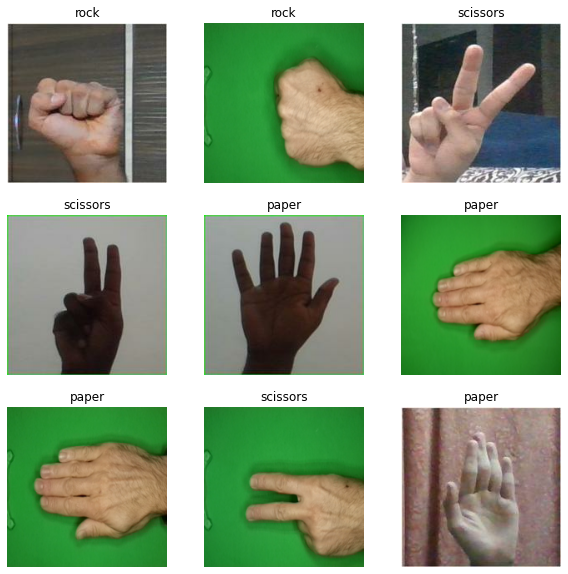

In [212]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [216]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 20)
val_dataset = validation_dataset.skip(val_batches // 20)
# was für einen Einfluss hat diese Zahl??

In [217]:

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 52
Number of test batches: 2


### Configure the dataset for performance

In [218]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Standardize Data

In [257]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [259]:
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.050980397 1.0


### Create the model

In [263]:
from tensorflow.keras.models import Sequential
num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

TypeError: Dimension value must be integer or None or have an __index__ method, got value '(192, 192)' with type '<class 'tuple'>'

## Data augementation

#### https://www.tensorflow.org/tutorials/images/data_augmentation

In [219]:
with tf.device('/cpu:0'):
      data_augmentation = tf.keras.Sequential([
      tf.keras.layers.RandomFlip('horizontal'),
      tf.keras.layers.RandomRotation(0.2),
    ])

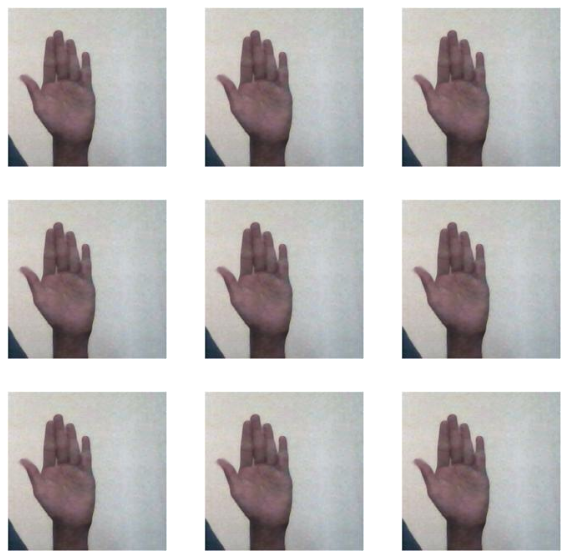

In [220]:
with tf.device('/cpu:0'):
 plt.figure(figsize=(10, 10))
 for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
  plt.imshow(augmented_image[0] / 255)
  plt.axis("off")

# 9x gleiches Bild obwohl Code hier gleich wie Aufgabe Woche 6 von Elena!!????

### Choose Transfer Learning Model

In [221]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [222]:
# Create the base model from the pre-trained model MobileNet V2

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [223]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [224]:
base_model.trainable = False

In [225]:
base_model.summary()

Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_11[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 24, 24, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 24, 24, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 24, 24, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 24, 24, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 12, 12, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 12, 12, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 12, 12, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 12, 12, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 12, 12, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 12, 12, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 12, 12, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 6, 6, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 6, 6, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 6, 6, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 6, 6, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [243]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False) #We need to set `training=False` as our model contains a `BatchNormalization` layer. More explanation here https://www.tensorflow.org/guide/keras/transfer_learning
x = tf.keras.layers.GlobalAveragePooling2D()(x) #this layer has the same purpose as tf.keras.layers.Flatten(). Need to connect something 2D to something 1D. Ask if you want to know more :)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
#x = tf.keras.layers.Dropout(rate=0.2)(x)
#x = tf.keras.layers.Dense(16, activation="relu")(x)
#x = tf.keras.layers.Dropout(rate=0.2)(x)
outputs = tf.keras.layers.Dense(1, activation="softmax")(x) 
model = tf.keras.Model(inputs, outputs)

#was hier als Output nehmen? Softmax i.O?

#### Compile the mode

In [244]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [245]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 sequential_16 (Sequential)  (1, 1, 1, 32, 192, 192,   0         
                             3)                                  
                                                                 
 tf.math.truediv_8 (TFOpLamb  (None, 192, 192, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_8 (TFOpLam  (None, 192, 192, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                    

### Train the model

In [246]:
initial_epochs = 5

loss0, accuracy0 = model.evaluate(validation_dataset)

52/52 [==============================] - 39s 710ms/step - loss: 0.2203 - accuracy: 0.3637


In [230]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.63
initial accuracy: 0.36


In [231]:
#early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True) ###<---  callbacks richtig?
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/5
205/205 [==============================] - 220s 1s/step - loss: -0.6209 - accuracy: 0.3623 - val_loss: -1.8237 - val_accuracy: 0.3637
Epoch 2/5
205/205 [==============================] - 193s 939ms/step - loss: -5.6240 - accuracy: 0.3623 - val_loss: -10.1005 - val_accuracy: 0.3637
Epoch 3/5
205/205 [==============================] - 190s 926ms/step - loss: -22.8800 - accuracy: 0.3623 - val_loss: -35.7667 - val_accuracy: 0.3637
Epoch 4/5
205/205 [==============================] - 196s 954ms/step - loss: -67.3453 - accuracy: 0.3623 - val_loss: -93.3993 - val_accuracy: 0.3637
Epoch 5/5
205/205 [==============================] - 192s 935ms/step - loss: -163.7364 - accuracy: 0.3623 - val_loss: -210.2640 - val_accuracy: 0.3637


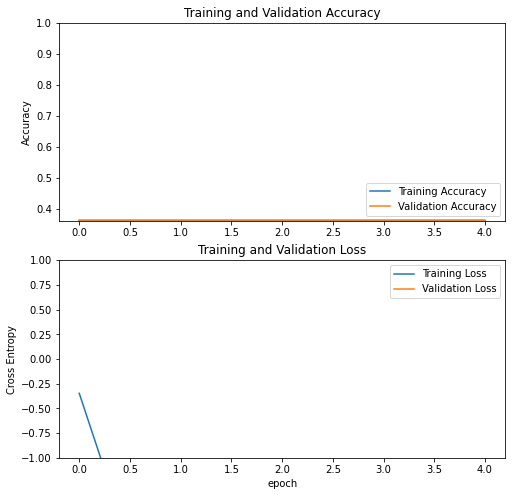

In [221]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1.0,1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine tuning

In [232]:
base_model.trainable = True

In [233]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [234]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [235]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 sequential_16 (Sequential)  (1, 1, 1, 32, 192, 192,   0         
                             3)                                  
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 192, 192, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 192, 192, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                    

In [237]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/20
 11/205 [>.............................] - ETA: 3:55 - loss: -1232.9330 - accuracy: 0.3778

KeyboardInterrupt: 

In [227]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

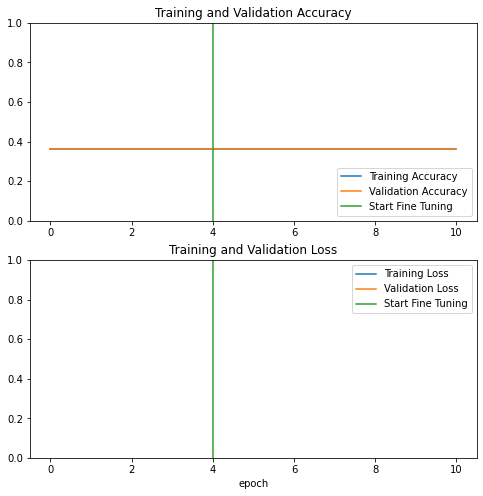

In [228]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluation and prediction

In [229]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

10/10 [==============================] - 7s 695ms/step - loss: -5602.5986 - accuracy: 0.3812
Test accuracy : 0.3812499940395355


Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 2 2 1 1 0 2 1 2 1 2 0 1 1 0 0 0 1 1 2 0 2 2 1 0 0 2 2 2 2 0 1]


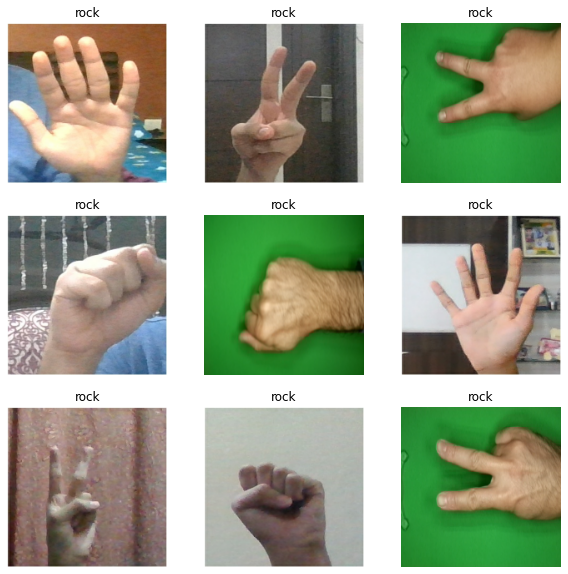

In [230]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [231]:
model.save("rockpaperscissors.h5")

# Use Webcam (works only local)

In [233]:
model_to_use=tf.keras.models.load_model ("rockpaperscissors.h5")

In [234]:
#take a picture with the integrated default camera
#pip install opencv-python
import cv2
import pymsgbox as pymsg

#access standard camera 0
videoCaptureObject = cv2.VideoCapture(0)

#show message 
msg = pymsg.alert("A picture was captured with the webcam.", 'Camera')
# OK whatever you type, it will return OK
print(msg)


#loop --> read frame and save it (set value to False)
result = True
contador = 0 
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imshow("Captura", frame)
    key = cv2.waitKey(1)
    if contador==50:
        cv2.imwrite("NewCamPicture.jpg",frame)
        result = False
    contador=contador+1

# release camera and destroy all windows
videoCaptureObject.release()
cv2.destroyAllWindows()

OK


This image most likely belongs to rock.


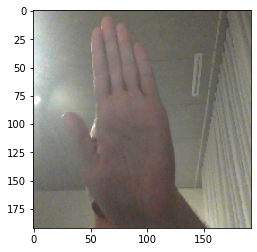

In [235]:
img = tf.keras.utils.load_img("NewCamPicture.jpg", target_size=(192,192)# your own image
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Add the image to a batch where it's the only member.


prediction = model.predict_on_batch(img_array).flatten()

prediction = tf.where(prediction < 0.5, 0, 1)


print(
    "This image most likely belongs to {}."
    .format(class_names[prediction[0]])
)

plt.imshow(img)